## Maybe Stemming with Stastrawi ????


## Tokenisasi

In [17]:
import pandas as pd

In [18]:
import nltk
from nltk.tokenize import word_tokenize

In [19]:
def tokenize_text(sentence):
    token = nltk.tokenize.word_tokenize(sentence)
    return token

In [20]:
df = pd.read_csv("C:\\Users\\thebl\\Documents\\Lomba\\SatDat2024\\FullSenyum-SatriaData2024\\Code\\Preprocessing\\cleaned_stop_word")

In [21]:
df['token'] = df['text'].apply(tokenize_text)
df.head()

,text,label,token
0,kunjungan prabowo meresmikan menyerahkan proye...,Sumber Daya Alam,"[kunjungan, prabowo, meresmikan, menyerahkan, ..."
1,anies tepuk tangan meriah rektor mewajibkan ma...,Politik,"[anies, tepuk, tangan, meriah, rektor, mewajib..."
2,memang benar sih pendukung anies dengan penduk...,Demografi,"[memang, benar, sih, pendukung, anies, dengan,..."
3,anies bersikap kritis kinerja prabowo dianggap...,Politik,"[anies, bersikap, kritis, kinerja, prabowo, di..."
4,anies baswedan harap asn tni polri pegang sump...,Politik,"[anies, baswedan, harap, asn, tni, polri, pega..."


## Stemming

In [22]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

In [23]:
def stemming_text(tokens):
    result = [stemmer.stem(token) for token in tokens]
    return result

In [24]:
df['stemmed'] = df['token'].apply(stemming_text)

In [25]:
df

,text,label,token,stemmed
0,kunjungan prabowo meresmikan menyerahkan proye...,Sumber Daya Alam,"[kunjungan, prabowo, meresmikan, menyerahkan, ...","[kunjung, prabowo, resmi, serah, proyek, bantu..."
1,anies tepuk tangan meriah rektor mewajibkan ma...,Politik,"[anies, tepuk, tangan, meriah, rektor, mewajib...","[anies, tepuk, tangan, riah, rektor, wajib, ma..."
2,memang benar sih pendukung anies dengan penduk...,Demografi,"[memang, benar, sih, pendukung, anies, dengan,...","[memang, benar, sih, dukung, anies, dengan, du..."
3,anies bersikap kritis kinerja prabowo dianggap...,Politik,"[anies, bersikap, kritis, kinerja, prabowo, di...","[anies, sikap, kritis, kerja, prabowo, anggap,..."
4,anies baswedan harap asn tni polri pegang sump...,Politik,"[anies, baswedan, harap, asn, tni, polri, pega...","[anies, baswedan, harap, asn, tni, polri, pega..."
...,...,...,...,...
4276,ngeliat debat kemarin pas prabowo kicep kekira...,Politik,"[ngeliat, debat, kemarin, pas, prabowo, kicep,...","[ngeliat, debat, kemarin, pas, prabowo, kicep,..."
4277,masyarakat prabowo gibran memiliki visi sejala...,Politik,"[masyarakat, prabowo, gibran, memiliki, visi, ...","[masyarakat, prabowo, gibran, milik, visi, jal..."
4278,imo both are irrational but irrational tbh but...,Ekonomi,"[imo, both, are, irrational, but, irrational, ...","[imo, both, are, irrational, but, irrational, ..."
4279,look at that ganjar berkecimpung lgislatif eks...,Pertahanan dan Keamanan,"[look, at, that, ganjar, berkecimpung, lgislat...","[look, at, that, ganjar, kecimpung, lgislatif,..."


In [26]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

In [27]:
all_tokens =[token for sublist in df['stemmed'] for token in sublist]
freq = FreqDist(all_tokens)
print(freq.most_common())

[('ganjar', 3870), ('prabowo', 2241), ('mahfud', 2071), ('anies', 2016), ('pranowo', 1471), ('presiden', 1150), ('pilih', 1087), ('calon', 902), ('indonesia', 862), ('dukung', 746), ('2024', 670), ('umat', 633), ('gibran', 588), ('rebound', 558), ('rakyat', 531), ('md', 466), ('jokowi', 422), ('menang', 389), ('pimpin', 384), ('debat', 359), ('program', 358), ('baswedan', 353), ('negara', 312), ('orang', 264), ('anak', 258), ('tani', 258), ('ubah', 242), ('politik', 239), ('dulu', 239), ('masyarakat', 238), ('tahan', 229), ('wakil', 227), ('kuat', 221), ('kampanye', 221), ('pasang', 218), ('muda', 211), ('pilpres', 210), ('coblos3', 207), ('lanjut', 206), ('maju', 203), ('kerja', 202), ('jakarta', 200), ('warga', 197), ('bangun', 192), ('3', 191), ('hebat', 188), ('hasil', 184), ('aamiin', 182), ('subianto', 180), ('1', 173), ('kalau', 171), ('salah', 171), ('ekonomi', 161), ('bawa', 154), ('suara', 153), ('desak', 152), ('amin', 151), ('sejahtera', 151), ('bangsa', 150), ('bapak', 147

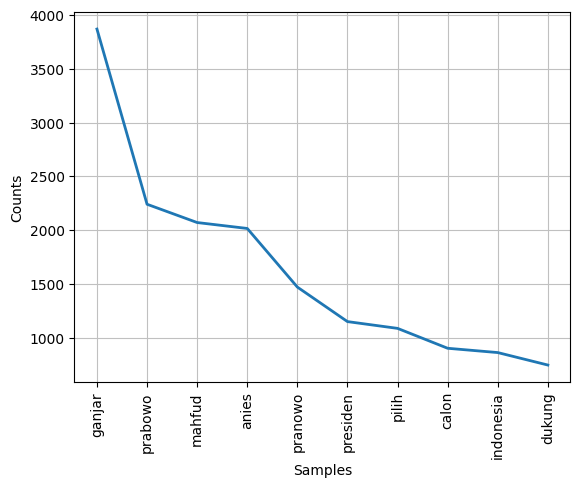

In [28]:
freq.plot(10,cumulative = False)
plt.show()

In [29]:
df['stemmed_text'] = df['stemmed'].apply(lambda tokens: ' '.join(tokens))
df

,text,label,token,stemmed,stemmed_text
0,kunjungan prabowo meresmikan menyerahkan proye...,Sumber Daya Alam,"[kunjungan, prabowo, meresmikan, menyerahkan, ...","[kunjung, prabowo, resmi, serah, proyek, bantu...",kunjung prabowo resmi serah proyek bantu air b...
1,anies tepuk tangan meriah rektor mewajibkan ma...,Politik,"[anies, tepuk, tangan, meriah, rektor, mewajib...","[anies, tepuk, tangan, riah, rektor, wajib, ma...",anies tepuk tangan riah rektor wajib mata kuli...
2,memang benar sih pendukung anies dengan penduk...,Demografi,"[memang, benar, sih, pendukung, anies, dengan,...","[memang, benar, sih, dukung, anies, dengan, du...",memang benar sih dukung anies dengan dukung pr...
3,anies bersikap kritis kinerja prabowo dianggap...,Politik,"[anies, bersikap, kritis, kinerja, prabowo, di...","[anies, sikap, kritis, kerja, prabowo, anggap,...",anies sikap kritis kerja prabowo anggap sopan ...
4,anies baswedan harap asn tni polri pegang sump...,Politik,"[anies, baswedan, harap, asn, tni, polri, pega...","[anies, baswedan, harap, asn, tni, polri, pega...",anies baswedan harap asn tni polri pegang sump...
...,...,...,...,...,...
4276,ngeliat debat kemarin pas prabowo kicep kekira...,Politik,"[ngeliat, debat, kemarin, pas, prabowo, kicep,...","[ngeliat, debat, kemarin, pas, prabowo, kicep,...",ngeliat debat kemarin pas prabowo kicep kira k...
4277,masyarakat prabowo gibran memiliki visi sejala...,Politik,"[masyarakat, prabowo, gibran, memiliki, visi, ...","[masyarakat, prabowo, gibran, milik, visi, jal...",masyarakat prabowo gibran milik visi jalan asp...
4278,imo both are irrational but irrational tbh but...,Ekonomi,"[imo, both, are, irrational, but, irrational, ...","[imo, both, are, irrational, but, irrational, ...",imo both are irrational but irrational tbh but...
4279,look at that ganjar berkecimpung lgislatif eks...,Pertahanan dan Keamanan,"[look, at, that, ganjar, berkecimpung, lgislat...","[look, at, that, ganjar, kecimpung, lgislatif,...",look at that ganjar kecimpung lgislatif ekseku...


In [30]:
df_clean_final = df.drop(columns=['token','stemmed'])
df_clean_final

,text,label,stemmed_text
0,kunjungan prabowo meresmikan menyerahkan proye...,Sumber Daya Alam,kunjung prabowo resmi serah proyek bantu air b...
1,anies tepuk tangan meriah rektor mewajibkan ma...,Politik,anies tepuk tangan riah rektor wajib mata kuli...
2,memang benar sih pendukung anies dengan penduk...,Demografi,memang benar sih dukung anies dengan dukung pr...
3,anies bersikap kritis kinerja prabowo dianggap...,Politik,anies sikap kritis kerja prabowo anggap sopan ...
4,anies baswedan harap asn tni polri pegang sump...,Politik,anies baswedan harap asn tni polri pegang sump...
...,...,...,...
4276,ngeliat debat kemarin pas prabowo kicep kekira...,Politik,ngeliat debat kemarin pas prabowo kicep kira k...
4277,masyarakat prabowo gibran memiliki visi sejala...,Politik,masyarakat prabowo gibran milik visi jalan asp...
4278,imo both are irrational but irrational tbh but...,Ekonomi,imo both are irrational but irrational tbh but...
4279,look at that ganjar berkecimpung lgislatif eks...,Pertahanan dan Keamanan,look at that ganjar kecimpung lgislatif ekseku...


In [31]:
df_clean_final['label_angka'] = df_clean_final.label.map({
    'Politik' : 0,
    'Sosial Budaya'  : 1,
    'Ideologi' : 2,
    'Pertahanan dan Keamanan' : 3,
    'Ekonomi' : 4,
    'Sumber Daya Alam' : 5,
    'Demografi' : 6,
    'Geografi' : 7
})
df_clean_final.head()

,text,label,stemmed_text,label_angka
0,kunjungan prabowo meresmikan menyerahkan proye...,Sumber Daya Alam,kunjung prabowo resmi serah proyek bantu air b...,5
1,anies tepuk tangan meriah rektor mewajibkan ma...,Politik,anies tepuk tangan riah rektor wajib mata kuli...,0
2,memang benar sih pendukung anies dengan penduk...,Demografi,memang benar sih dukung anies dengan dukung pr...,6
3,anies bersikap kritis kinerja prabowo dianggap...,Politik,anies sikap kritis kerja prabowo anggap sopan ...,0
4,anies baswedan harap asn tni polri pegang sump...,Politik,anies baswedan harap asn tni polri pegang sump...,0


In [32]:
df_clean_final.to_csv('cleaned_final', index=False)